In [27]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
df_crypto = pd.read_csv("crypto_data.csv")
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
if_true_df = df_crypto[df_crypto["IsTrading"] == True]
if_true_df 

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
is_true_no_na = if_true_df.dropna()
is_true_no_na

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [33]:

coinsmined_df = is_true_no_na[is_true_no_na["TotalCoinsMined"]>0]
drop_coinname_df = coinsmined_df.drop('CoinName', axis=1)
drop_istrading_df = drop_coinname_df.drop('IsTrading', axis=1)


In [34]:
df_dummies = pd.get_dummies(drop_istrading_df,drop_first = True)
df_dummies

,TotalCoinsMined,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,Unnamed: 0_AC3,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
iris_scaled = StandardScaler().fit_transform(df_dummies)

In [36]:
# Initialize PCA model
pca = PCA(n_components=.90)

# Get two principal components for the iris data.
df_pca = pca.fit_transform(iris_scaled)
len(df_pca)

532

In [37]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

# Reduce dimensions
tsne_features = tsne.fit_transform(df_pca)

tsne_features

array([[ 0.8413809 ,  1.3418382 ],
       [ 0.5513953 ,  2.518467  ],
       [-1.3783    ,  2.4287353 ],
       ...,
       [ 0.97327995, -1.5346801 ],
       [-2.1381664 , -1.5715946 ],
       [-3.8317542 , -4.343992  ]], dtype=float32)

In [43]:
# The first column of transformed features
df_dummies['x'] = tsne_features[:,0]

# The second column of transformed features
df_dummies['y'] = tsne_features[:,1]

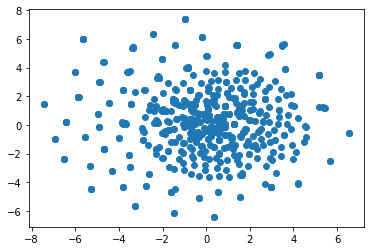

In [41]:
plt.scatter(df_dummies['x'], df_dummies['y'])
plt.show()

C:\Users\bmontague\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


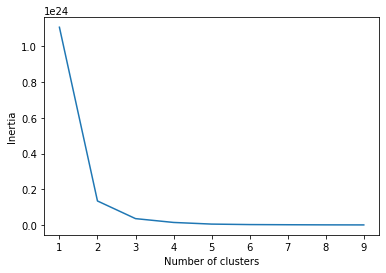

In [44]:
#Finding best K Value

inertia = []
# Same as k = list(range(1, 10))
k = [1,2,3,4,5,6,7,8,9]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_dummies)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()